# Elo Score Calculation

In [1]:
import re
import os
import sys
from collections import defaultdict

In [2]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import xlrd
from labellines import labelLine, labelLines

In [4]:
# setting path
sys.path.append('../../src')

In [5]:
from eloscore import eloscore

In [6]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

## Summary

- Notebook that calcuates the Elo Score of mice competing over access to a tone associated reward port
- The data is a spreadsheet of combination of subjects (as rows) against dates (as columns)

## Importing Data for One Sheet

- The original data has been trimmed so that only the cells with dates, winner ID's, and relevant metadata were kept

In [7]:
xls = pd.ExcelFile("./data/Home_Cage_Behaviors_Data.xlsx")
sheets = xls.sheet_names

In [8]:
sheets

['Elo_Score_Data', 'CAGE1', 'CAGE2', 'CAGE3', 'CAGE4', 'CAGE5', 'CAGE6']

In [9]:
home_cage_observations_df = pd.read_excel("./data/Home_Cage_Behaviors_Data.xlsx", sheet_name=sheets[1], header=1)

In [10]:
copy_home_cage_observations_df = home_cage_observations_df.copy()

In [11]:
home_cage_observations_df.head()

,observer,notes,length of observations,date,cage #,initiator,receiver,action,1,2,3,4
0,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,3,1,fs,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaT,1.0,1,2,fs,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaT,1.0,1,4,ag,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaT,1.0,1,4,as,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,1.0,1,2,ag,NaN,NaN,NaN,NaN


## Adding the session number

- Each new session has the date as a row, so we will get the index of all the rows with dates

In [12]:
home_cage_observations_df.dropna(axis=0, subset="date")

,observer,notes,length of observations,date,cage #,initiator,receiver,action,1,2,3,4
0,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,3,1,fs,NaN,NaN,NaN,NaN
20,Meghan,"1:06-1:36PM, lots of grooming due to bleaching...",30min,2022-06-29,1.0,1,3,fs,NaN,NaN,NaN,NaN
46,Erika,"10:55 am - 11:25 am, C57",30 min,2022-06-29,1.0,2,4,as,NaN,NaN,NaN,NaN
62,Catalina,"C57, 2:30 pm - 3:00 pm",30 minutes,2022-06-30,1.0,2,4,fs,NaN,NaN,NaN,NaN
75,Naeliz,"C57, 10:58am-11:29am",30 min,2022-07-01,1.0,4,3,fs,NaN,NaN,NaN,NaN
96,Nancy,1157-1227pm observation after 30 min isolation...,30 min,2022-07-02,1.0,1,3,fs,NaN,NaN,NaN,NaN
107,Isabel,9:26am C57 observation without mouse 1,30min,2022-07-03,1.0,4,2,ag,NaN,NaN,NaN,NaN
113,Isabel,"more energetic when the alpha came back, but s...",15min,2022-07-03,1.0,3,2,fs,NaN,NaN,NaN,NaN
123,erika,"C57, removal of mouse 2, 10 min habituation (1...",30 min,2022-07-04,1.0,1,4,fs,NaN,NaN,NaN,NaN
144,erika,"C57, reintroduction of mouse 2 into cage, obse...",15 min,2022-07-04,1.0,2,3,fs,NaN,NaN,NaN,NaN


- Getting the indexes of where each new session starts

In [13]:
home_cage_observations_df.dropna(axis=0, subset="date").index

Int64Index([0, 20, 46, 62, 75, 96, 107, 113, 123, 144, 155, 166, 172, 187,
            194],
           dtype='int64')

In [14]:
session_indexes = home_cage_observations_df.dropna(axis=0, subset="date").index

- Adding a column for the session number and then filling all the `NaNs`

In [15]:
home_cage_observations_df = eloscore.add_session_number_column(home_cage_observations_df, session_indexes)
home_cage_observations_df = home_cage_observations_df.fillna(method='ffill')

- Making another column for plotting

In [16]:
home_cage_observations_df = eloscore.add_session_number_column(home_cage_observations_df, session_indexes, session_number_column="session_number_plotting")

In [17]:
home_cage_observations_df.head()

,observer,notes,length of observations,date,cage #,initiator,receiver,action,1,2,3,4,session_number,session_number_plotting
0,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,3,1,fs,NaN,NaN,NaN,NaN,1.0,1.0
1,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,1,2,fs,NaN,NaN,NaN,NaN,1.0,NaN
2,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,1,4,ag,NaN,NaN,NaN,NaN,1.0,NaN
3,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,1,4,as,NaN,NaN,NaN,NaN,1.0,NaN
4,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,1,2,ag,NaN,NaN,NaN,NaN,1.0,NaN


## Calculating ELO Score

- Example calculation

In [18]:
eloscore.calculate_elo_score(subject_elo_score=1000, agent_elo_score=2000)

1020

## Get the Elo score for all the events

In [19]:
home_cage_observations_df.head()

,observer,notes,length of observations,date,cage #,initiator,receiver,action,1,2,3,4,session_number,session_number_plotting
0,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,3,1,fs,NaN,NaN,NaN,NaN,1.0,1.0
1,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,1,2,fs,NaN,NaN,NaN,NaN,1.0,NaN
2,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,1,4,ag,NaN,NaN,NaN,NaN,1.0,NaN
3,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,1,4,as,NaN,NaN,NaN,NaN,1.0,NaN
4,Isabel,"9:27-9:57am, C57 lots of grooming and rearing",30min,2022-06-29,1.0,1,2,ag,NaN,NaN,NaN,NaN,1.0,NaN


In [22]:
eloscore.update_elo_score(winner_id="A", loser_id="B")

defaultdict(<function eloscore.eloscore.update_elo_score.<locals>.<lambda>()>,
            {'A': 1010.0, 'B': 990.0})

- Function that creates a dictionary that has the original/updated elo score for each event

In [31]:
index_to_elo_score_and_meta_data = eloscore.iterate_elo_score_calculation_for_data_frame(data_frame=home_cage_observations_df, winner_column="initiator", loser_column="receiver", additional_columns=["date", "session_number", "session_number_plotting"])

In [32]:
index_to_elo_score_and_meta_data[0]

{'total_match_number': 1,
 'subject_id': 3,
 'agent_id': 1,
 'original_elo_score': 1000,
 'updated_elo_score': 1010.0,
 'win_draw_loss': 1,
 'date': Timestamp('2022-06-29 00:00:00'),
 'session_number': 1.0,
 'session_number_plotting': 1.0}

- Turning the dictionary into a dataframe

In [33]:
home_cage_elo_score_df = pd.DataFrame.from_dict(index_to_elo_score_and_meta_data, orient="index")

In [34]:
home_cage_elo_score_df.head()

,total_match_number,subject_id,agent_id,original_elo_score,updated_elo_score,win_draw_loss,date,session_number,session_number_plotting
0,1,3,1,1000.0,1010.0,1,2022-06-29,1.0,1.0
1,1,1,1,1000.0,990.0,1,2022-06-29,1.0,1.0
2,2,1,2,990.0,1000.3,1,2022-06-29,1.0,NaN
3,2,2,2,1000.0,989.7,1,2022-06-29,1.0,NaN
4,3,1,4,1000.3,1010.3,1,2022-06-29,1.0,NaN


In [35]:
home_cage_elo_score_df.tail()

,total_match_number,subject_id,agent_id,original_elo_score,updated_elo_score,win_draw_loss,date,session_number,session_number_plotting
397,199,1,1,958.9,951.9,1,2022-07-07,15.0,NaN
398,200,2,1,1075.0,1081.6,1,2022-07-07,15.0,NaN
399,200,1,1,951.9,945.3,1,2022-07-07,15.0,NaN
400,201,2,1,1081.6,1087.9,1,2022-07-07,15.0,NaN
401,201,1,1,945.3,939.0,1,2022-07-07,15.0,NaN


In [37]:
home_cage_elo_score_df.groupby("subject_id").count()

,total_match_number,agent_id,original_elo_score,updated_elo_score,win_draw_loss,date,session_number,session_number_plotting
subject_id,,,,,,,,
1,93,93,93,93,93,93,93,7
2,107,107,107,107,107,107,107,8
3,101,101,101,101,101,101,101,9
4,101,101,101,101,101,101,101,6


In [36]:
home_cage_elo_score_df.groupby("session_number").count()

,total_match_number,subject_id,agent_id,original_elo_score,updated_elo_score,win_draw_loss,date,session_number_plotting
session_number,,,,,,,,
1.0,40,40,40,40,40,40,40,2
2.0,52,52,52,52,52,52,52,2
3.0,32,32,32,32,32,32,32,2
4.0,26,26,26,26,26,26,26,2
5.0,42,42,42,42,42,42,42,2
6.0,22,22,22,22,22,22,22,2
7.0,12,12,12,12,12,12,12,2
8.0,20,20,20,20,20,20,20,2
9.0,42,42,42,42,42,42,42,2


# Plotting the Elo Score by match number

In [42]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

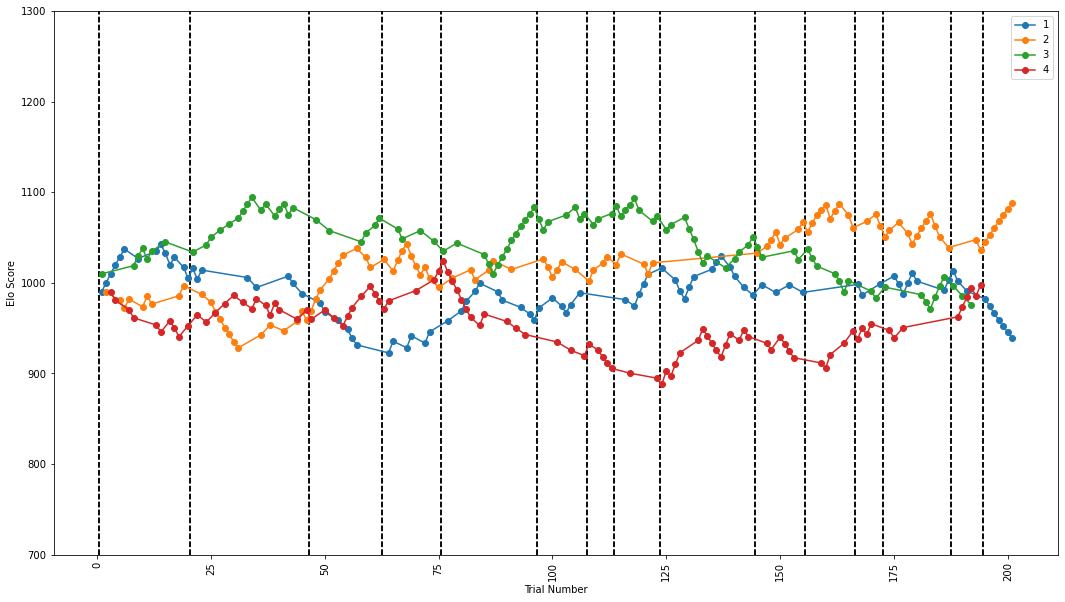

In [45]:
fig, ax = plt.subplots()

# Drawing vertical lines that represent when each session begins
for index, row in home_cage_elo_score_df.dropna(subset=["session_number_plotting"]).iterrows():
    # Offsetting by 0.5 to avoid drawing the line on the dot
    plt.vlines(x=[row["total_match_number"] - 0.5], ymin=700, ymax=1300, colors='black', linestyle='dashed')

# Drawing a line for each subject
for subject in sorted(home_cage_elo_score_df["subject_id"].unique()):
    # Getting all the rows with the current subject
    subject_df = home_cage_elo_score_df[home_cage_elo_score_df["subject_id"] == subject]
    # Making the dates into days after the first session by subtracting all the dates by the first date
    plt.plot(subject_df["total_match_number"], subject_df["updated_elo_score"], '-o', label=subject)

# Labeling the X/Y Axis and the title
ax.set_xlabel("Trial Number")
ax.set_ylabel("Elo Score")
# ax.set_title("Elo Score for Home Cage Observation: Cage {}".format(cage))
# To show the legend
ax.legend()
plt.xticks(rotation=90)
plt.ylim(700, 1300) 
plt.show()



# Calculate the Elo Score for all sheets

In [46]:
xls = pd.ExcelFile("./data/Home_Cage_Behaviors_Data.xlsx")
sheets = xls.sheet_names

In [47]:
sheets

['Elo_Score_Data', 'CAGE1', 'CAGE2', 'CAGE3', 'CAGE4', 'CAGE5', 'CAGE6']

In [77]:
sheet_to_data_frame = defaultdict(dict)
for sheet in sheets[1:]:
    sheet_to_data_frame[sheet]["recording_data_frame"] = pd.read_excel("./data/Home_Cage_Behaviors_Data.xlsx", sheet_name=sheet, header=1).copy()
    # Adding the session numbers as a column
    session_indexes = sheet_to_data_frame[sheet]["recording_data_frame"].dropna(axis=0, subset="date").index
    sheet_to_data_frame[sheet]["recording_data_frame"] = eloscore.add_session_number_column(sheet_to_data_frame[sheet]["recording_data_frame"], session_indexes)
    sheet_to_data_frame[sheet]["recording_data_frame"] = sheet_to_data_frame[sheet]["recording_data_frame"].fillna(method='ffill')
    sheet_to_data_frame[sheet]["recording_data_frame"] = eloscore.add_session_number_column(sheet_to_data_frame[sheet]["recording_data_frame"], session_indexes, session_number_column="session_number_plotting")

    # Splitting all the rows with commas in the ID
    sheet_to_data_frame[sheet]["recording_data_frame"]["initiator"] = sheet_to_data_frame[sheet]["recording_data_frame"]["initiator"].astype(str)
    sheet_to_data_frame[sheet]["recording_data_frame"]["receiver"] = sheet_to_data_frame[sheet]["recording_data_frame"]["receiver"].astype(str)
    
    sheet_to_data_frame[sheet]["recording_data_frame"]["initiator"] = sheet_to_data_frame[sheet]["recording_data_frame"]["initiator"].str.split(",")
    sheet_to_data_frame[sheet]["recording_data_frame"] = sheet_to_data_frame[sheet]["recording_data_frame"].explode("initiator").reset_index(drop=True)
    sheet_to_data_frame[sheet]["recording_data_frame"]["receiver"] = sheet_to_data_frame[sheet]["recording_data_frame"]["receiver"].str.split(",")
    sheet_to_data_frame[sheet]["recording_data_frame"] = sheet_to_data_frame[sheet]["recording_data_frame"].explode("receiver").reset_index(drop=True)

    sheet_to_data_frame[sheet]["recording_data_frame"]["initiator"] = sheet_to_data_frame[sheet]["recording_data_frame"]["initiator"].astype(float).astype(int).astype(str)
    sheet_to_data_frame[sheet]["recording_data_frame"]["receiver"] = sheet_to_data_frame[sheet]["recording_data_frame"]["receiver"].astype(float).astype(int).astype(str)
    
    # Calculating the Elo Score    
    index_to_elo_score_and_meta_data = eloscore.iterate_elo_score_calculation_for_data_frame(data_frame=sheet_to_data_frame[sheet]["recording_data_frame"], \
                                                                                                               winner_column="initiator", loser_column="receiver", additional_columns=["date", "session_number", "session_number_plotting"])
    sheet_to_data_frame[sheet]["elo_score_data_frame"] = pd.DataFrame.from_dict(index_to_elo_score_and_meta_data, orient="index")

# Making plots for all sheets

- Getting the dates the files were being recorded to use for the file name

In [94]:
sheets[1]

'CAGE1'

In [88]:
earliest_date = str(sheet_to_data_frame[sheets[1]]["recording_data_frame"]["date"].min()).split()[0]

In [95]:
latest_date = str(sheet_to_data_frame[sheets[1]]["recording_data_frame"]["date"].max()).split()[0]

In [96]:
earliest_date

'2022-06-29'

In [97]:
latest_date

'2022-07-07'

- Getting the cage numbers

In [105]:
all_cages = "_".join(sorted([sheet.lower().strip("cage").strip() for sheet in sheets[1:]]))

In [106]:
all_cages

'1_2_3_4_5_6'

In [111]:
output_directory = "./proc/plots/home_cage_elo_score/cage_{}_date_{}_{}".format(all_cages, earliest_date, latest_date)

In [112]:
output_directory

'./proc/plots/home_cage_elo_score/cage_1_2_3_4_5_6_date_2022-06-29_2022-07-07'

In [113]:
os.makedirs(output_directory, exist_ok=True)

CAGE1


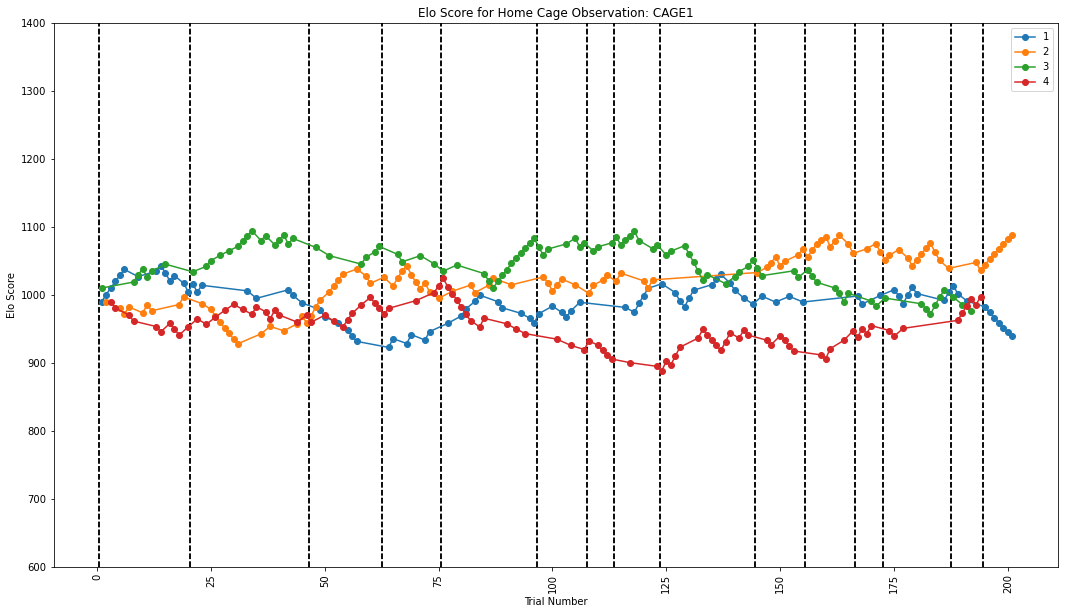

CAGE2


<Figure size 1296x720 with 0 Axes>

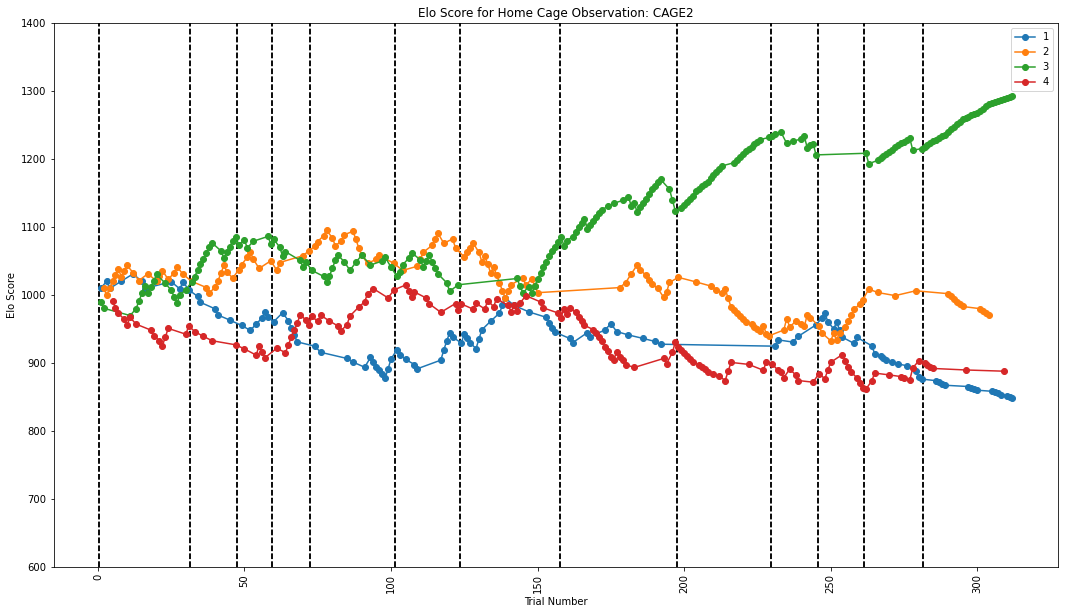

CAGE3


<Figure size 1296x720 with 0 Axes>

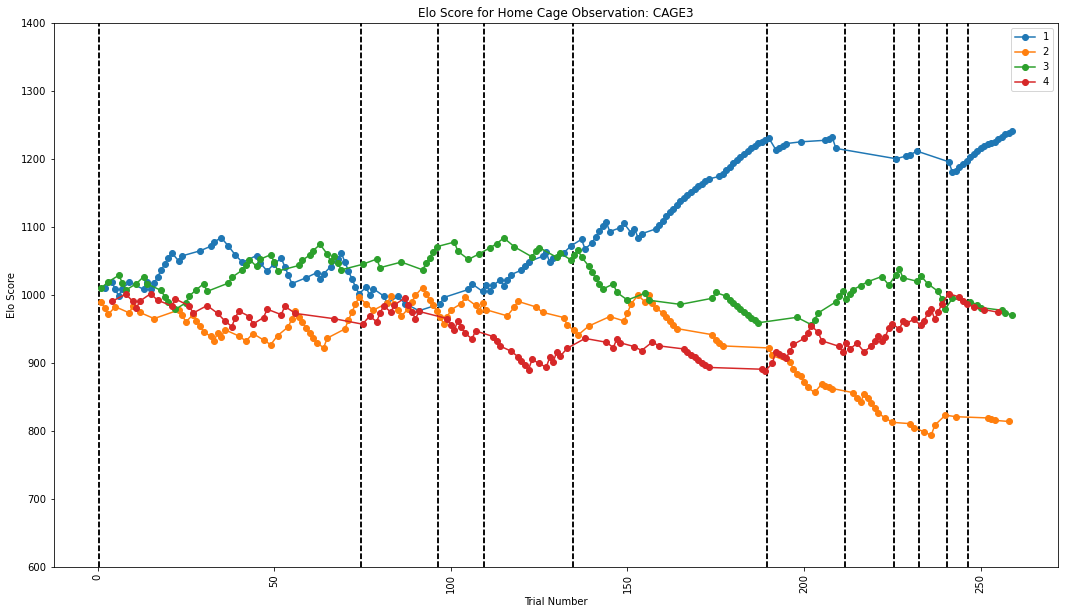

CAGE4


<Figure size 1296x720 with 0 Axes>

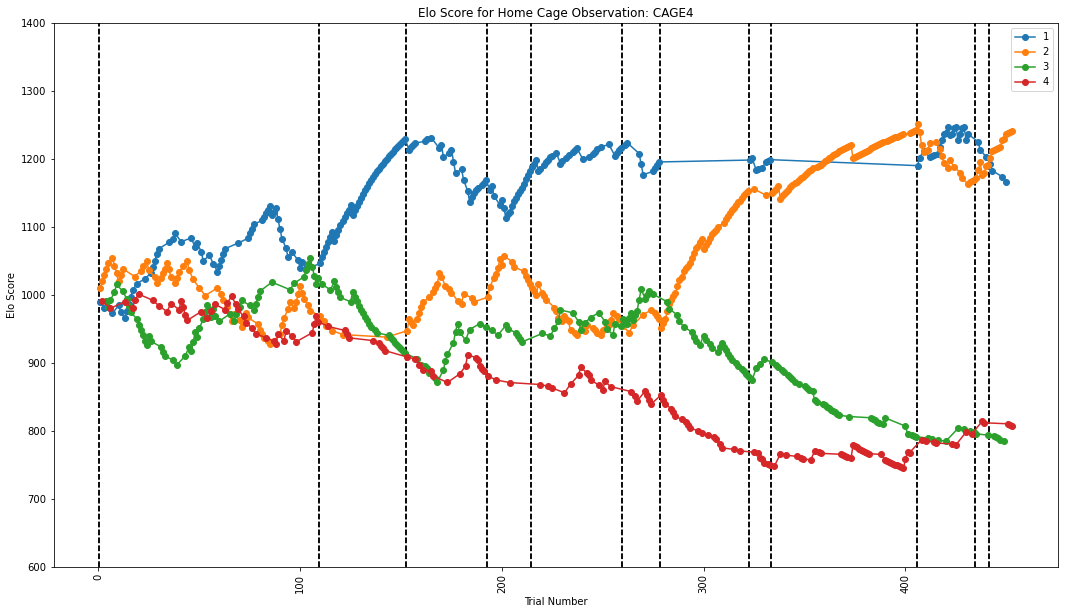

CAGE5


<Figure size 1296x720 with 0 Axes>

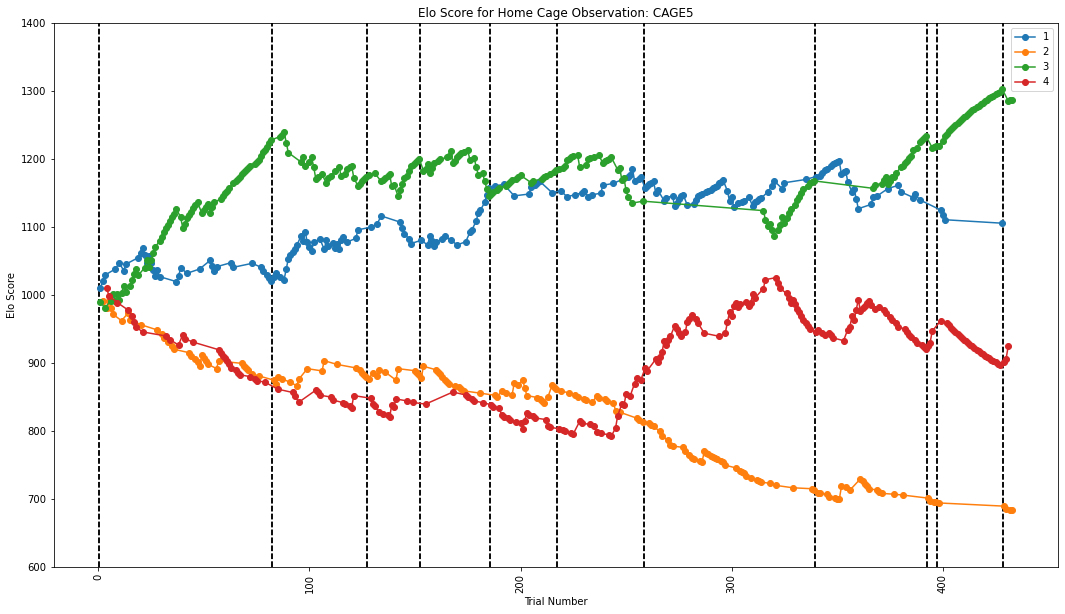

CAGE6


<Figure size 1296x720 with 0 Axes>

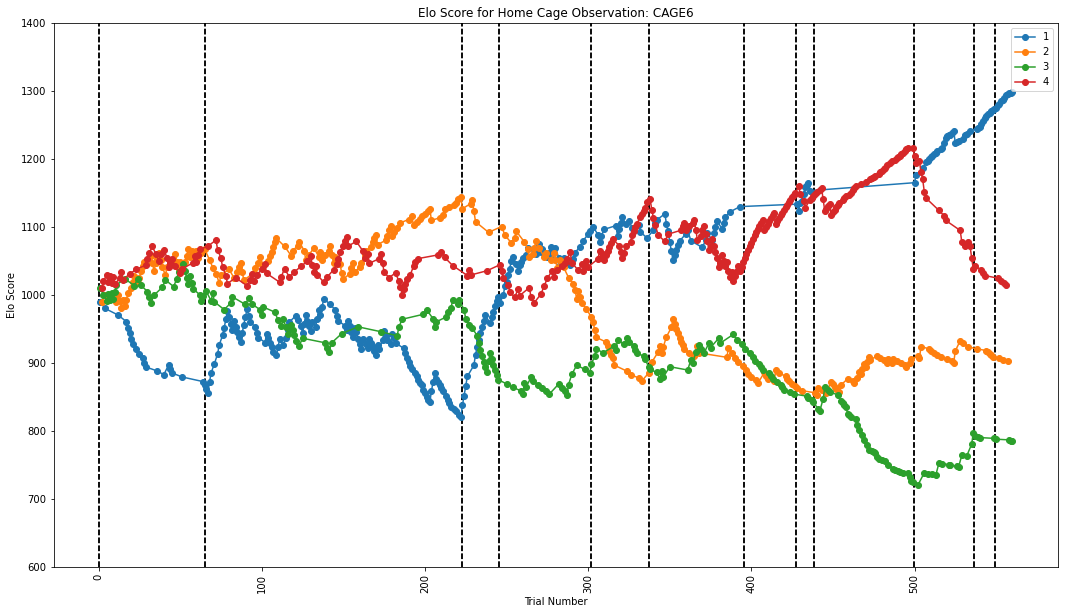

<Figure size 1296x720 with 0 Axes>

In [114]:
for key, value in sheet_to_data_frame.items():
    print(key)
    elo_score_data_frame = value["elo_score_data_frame"]
    fig, ax = plt.subplots()

    # Drawing vertical lines that represent when each session begins
    for index, row in elo_score_data_frame.dropna(subset=["session_number_plotting"]).iterrows():
        # Offsetting by 0.5 to avoid drawing the line on the dot
        plt.vlines(x=[row["total_match_number"] - 0.5], ymin=600, ymax=1400, colors='black', linestyle='dashed')

    # Drawing a line for each subject
    for subject in sorted(elo_score_data_frame["subject_id"].astype(str).unique()):
        # Getting all the rows with the current subject
        subject_df = elo_score_data_frame[elo_score_data_frame["subject_id"] == subject]
        # Making the dates into days after the first session by subtracting all the dates by the first date
        plt.plot(subject_df["total_match_number"], subject_df["updated_elo_score"], '-o', label=subject)

    # Labeling the X/Y Axis and the title
    ax.set_xlabel("Trial Number")
    ax.set_ylabel("Elo Score")
    ax.set_title("Elo Score for Home Cage Observation: {}".format(key))
    # To show the legend
    ax.legend()
    plt.xticks(rotation=90)
    plt.ylim(600, 1400) 
    plt.show()
    
    file_name = "home_cage_elo_score_{}_date_{}_{}.png".format(key, earliest_date, latest_date)
    plt.savefig(os.path.join(output_directory, file_name))